In [27]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import CubicSpline

from models import deconvolution
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "mathptmx",
    'font.size': 20
})

In [28]:
def problem_system_continuous(grid: np.array)-> np.array:

    # Define boundary and internal points
    x = np.array([-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.3, -0.1, 0.0, 0.2, 0.5, 0.6, 1])
    y = np.array([0, 0.0, 0.0, -0.6, 0., 0.6, 0.2,  -0.1, 0.4, 0.8, 0.1, -0.1, -0.2])

    # Create a cubic spline interpolation of the points
    cs = CubicSpline(x, y)
    output = cs(grid)
    
    return output

In [29]:
n_t = 100
n_y = 100
domain = [-1, 1]


In [30]:

# Generate the grid
t = np.linspace(domain[0],domain[1], n_t)
t = np.round(t, 3)
h = domain[1] / n_t
# Create the convolution matrix A
model = deconvolution(int(np.round(n_y/8)), int(n_y/16), 'reflect')
A = model.linear_operator(n_t)
A = A[::round(n_t/n_y), :]
#A[0,0] = 0
#A[-1, -1] = 0


# Generate grid points
x = np.linspace(domain[0], domain[1] - h, n_y)
# Construct the true function
true = problem_system_continuous(t)

true = true.reshape(-1,1)
temp = A@true
#ind = temp > 0
#temp *= ind

# Create y_data with noise
y_data_additive = temp + np.random.normal(0, 0.1, temp.shape)
y_data_multiplicative = temp*np.random.normal(0, 0.8, temp.shape)

In [31]:
plt.plot(t, temp)
plt.plot(t, y_data_additive)
plt.axis([domain[0], domain[1], -1.0, 1.7])
plt.xlabel('t')
plt.ylabel('x')

Text(0, 0.5, 'x')

Error in callback <function _draw_all_if_interactive at 0x7868007e2700> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 640x480 with 1 Axes>

In [32]:
plt.plot(t, temp)
plt.plot(t, y_data_multiplicative)
plt.axis([domain[0], domain[1], -1.0, 1.7])
plt.xlabel('t')
plt.ylabel('x')

Text(0, 0.5, 'x')

Error in callback <function _draw_all_if_interactive at 0x7868007e2700> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 640x480 with 1 Axes>

(-1.0, 1.0, -1.0, 1.0)

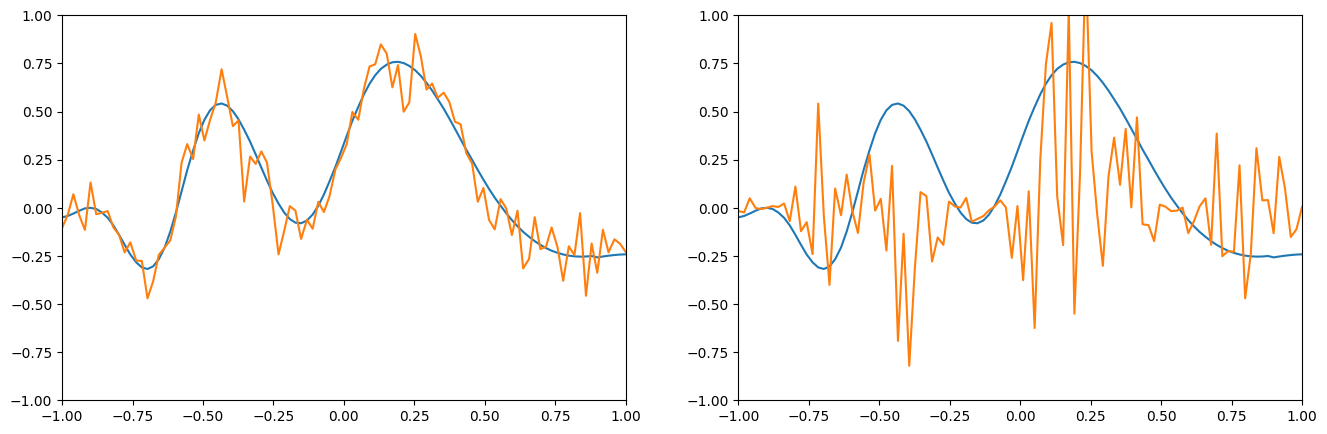

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
axs[0].plot(t, temp)
axs[0].plot(t, y_data_additive)
axs[0].axis([domain[0], domain[1], -1.0, 1.0])

axs[1].plot(t, temp)
axs[1].plot(t, y_data_multiplicative)
axs[1].axis([domain[0], domain[1], -1.0, 1.0])